# <center>**Project 1 : COLOR COMPRESSION** </center>
**Subject**        : Applied Mathematics and Statistics for Imformation Technology <br>
**Student Name**   : Phạm Hồng Gia Bảo <br>
**Student ID**     : 21127014 <br>
**Class**          : 21CLC07 <br>

### Import library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### k-Means Clustering

## distance between each pixel and centroids

In [2]:
def kmeans(img, clusteringNumber, max_iter, centroid="random"): # Đầu tiên, ta khởi tạo vị trí các centroids (random or in_pixels) dựa trên biến centroid
    if centroid == "in_pixels":
        centroids = img[
            np.random.choice(img.shape[0], size = clusteringNumber, replace = False)
        ]
    elif centroid == "random":
        centroids = np.random.randint(0, 255, size = (clusteringNumber, img.shape[1]))
    else:
        raise ValueError('centroid must be "random" or "in_pixels"')

    for i in range(max_iter):
        # tính khoảng cách giữa các pixel và các centroids
        distance = np.linalg.norm(img - centroids[:, np.newaxis], axis=2)
        # gán nhãn cho các pixel
        labels = np.argmin(distance, axis=0)
        # cập nhật lại các centroid
        means = []
        for j in range(clusteringNumber):
            # gán từng điểm ảnh vào tâm cụm gần nhất 
            means.append(img[labels == j].mean(axis=0)) 
        means = np.array(means)
        for i in range(clusteringNumber):
            if len(means[i]) != 0:
                # cập nhật lại các tâm cụm dựa trên giá trị trung bình của tất cả các điểm ảnh được gán cho mỗi tâm cụm
                centroids[i] = means[i]
    return centroids, labels

### Save Image as format defined

In [3]:
def saveImg(name_img, colorClustering, label, formatPic):
    outImg = Image.fromarray(name_img)
    outImg.save("centroids_" + label + "_" + colorClustering + formatPic)

### Resize Image

In [4]:
def resizeImg(raw_img):
    img = np.array(raw_img)
    height, width = img.shape[0], img.shape[1]
    img = img.reshape(height * width, img.shape[2])
    return img, height, width

### Define format to save IMG

In [5]:
def optionFormatPic():
    print('****************************** Output Format ***********************************')
    print('Enter 1 : Output as PNG file')
    print('Enter 2 : Output as JPG file')
    print('Enter 3 : Output as PDF file')
    option = int(input('Choose option : '))
    print('********************************************************************************')
    if (option == 1):
        return '.png'
    if (option == 2):
        return '.jpg'
    if (option == 3):
        return '.pdf'  

### Define way to init centroids

In [6]:
def optionInitCentroids():
    print('*************************** Init Centroids ****************************************')
    print('Enter 1: in_pixels --> centroid is a random pixels of original image')
    print('Enter 2: random    --> centroid has c channels, with c is initial random in [0,255]')
    option = int(input('Choose  Init Centroids : '))
    print('***********************************************************************************')
    if (option == 1):
        return 'in_pixels'
    if (option == 2):
        return  'random'

### Process IMG for the controids defined 

In [7]:
# Xử lý hình ảnh bằng cách sử dụng thuật toán 
# k-means để nén hình ảnh ban đầu thành các phiên bản 
# nhỏ hơn với số lượng màu sắc khác nhau. 
def processingImg(raw_img, formatPic, centroids_list):
    img_sol = []
    img_sol.append(raw_img)

    for colorClustering in [3, 5, 7]:
        resultImg, height, width = resizeImg(raw_img)
        centroids, labels = kmeans(resultImg, colorClustering, 10, centroids_list)

        # dán nhãn lại cho các pixels của centroid
        for k in range(centroids.shape[0]):
            resultImg[labels == k] = centroids[k]

        resultImg = resultImg.astype("uint8")
        resultImg = resultImg.reshape(height, width, 3)
        img_sol.append(resultImg.copy())
        # Lưu hình ảnh đã nén với số lượng màu sắc tương ứng vào định dạng được chỉ định
        typeProcessing = centroids_list
        cluster_str = str(colorClustering)
        saveImg(resultImg, cluster_str, typeProcessing, formatPic)
    # Vẽ hình ảnh kết quả trên plot với số lượng màu sắc tương ứng để dễ dàng so sánh sự khác biệt
    plot_iter = 1
    demo, axis = plt.subplots(1, 3, figsize=(12, 8), layout="constrained")

    for i, k in [(0, 3), (1, 5), (2, 7)]:
        axis[i].set_title(f"centroids {centroids_list} with K = {k}")
        axis[i].imshow(img_sol[plot_iter])
        plot_iter += 1
    plt.tight_layout()

### Main function to call all input needed

In [8]:
def main():
    init_centroids_list = optionInitCentroids()

    name_img = input("Choose Image Name : ")

    raw_img = Image.open(name_img)

    formatPic = optionFormatPic()

    processingImg(raw_img, formatPic, init_centroids_list)
    

*************************** Init Centroids ****************************************
Enter 1: in_pixels --> centroid is a random pixels of original image
Enter 2: random    --> centroid has c channels, with c is initial random in [0,255]
***********************************************************************************
****************************** Output Format ***********************************
Enter 1 : Output as PNG file
Enter 2 : Output as JPG file
Enter 3 : Output as PDF file
********************************************************************************


C:\Users\HP-PC\AppData\Local\Temp\ipykernel_14304\1838142609.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


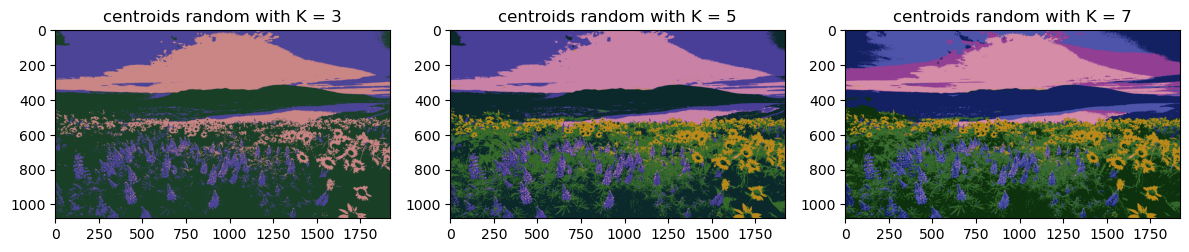

In [9]:
if __name__ == "__main__":
    main()